In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB 
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from keras.utils import to_categorical

## Data

In [ ]:
path = "data_cleaned.csv"

In [ ]:
data = pd.read_csv(path,header=None)

In [ ]:
data

,0,1
0,touch me turn me on and burn me down your li...,0
1,well i dont give a damn that your cars on fire...,0
2,i saw you starin at each other i saw your eyes...,0
3,your cruel device your blood like ice one look...,0
4,stretch the bones over my skin stretch the ski...,0
...,...,...
2459,haces muy mal en elevar mi tensión en aplastar...,3
2460,cierro los ojos sin mirar atrás las cosas buen...,3
2461,una palomita blanca de piquito colorado ayer y...,3
2462,sólo una palabra se hubiera llevado el dolor c...,3


In [ ]:
labels = data.iloc[:,1]
lyrics = data.iloc[:,0]

In [ ]:
labels[2462]

3

In [ ]:
lyrics[2462]

'sólo una palabra se hubiera llevado el dolor con el beso amargo de aquel licor hubiera bastado mi amor sólo una mentira se viene conmigo a pasear sentirme querida en aquel abrazo en el mar  con el vestido azul que un día conociste me marcho sin saber si me besaste antes de irte te di mi corazón y tú lo regalaste te di todo el amor que pude darte y me robaste he rasgado mi vestido con una copa de vino hoy tu amor corta como el cristal  en el cielo hay playas donde ves la vida pasar donde los recuerdos no hacen llorar vienen muy despacio y se van sólo una caricia me hubiera ayudado a olvidar que no eran mis labios los que ahora te hacen soñar  con el vestido azul que un día conociste me marcho sin saber si me besaste antes de irte te di mi corazón y tú lo regalaste te di todo el amor que pude darte y me robaste he rasgado mi vestido con una copa de vino hoy tu amor corta como el cristal buena suerte en tu camino yo ya tengo mi destino con mi sangre escribo este final'

In [ ]:
lyrics

0       touch me turn me on and burn me down   your li...
1       well i dont give a damn that your cars on fire...
2       i saw you starin at each other i saw your eyes...
3       your cruel device your blood like ice one look...
4       stretch the bones over my skin stretch the ski...
                              ...                        
2459    haces muy mal en elevar mi tensión en aplastar...
2460    cierro los ojos sin mirar atrás las cosas buen...
2461    una palomita blanca de piquito colorado ayer y...
2462    sólo una palabra se hubiera llevado el dolor c...
2463    lover please please come back dont take a trai...
Name: 0, Length: 2464, dtype: object

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(lyrics, labels, test_size=0.2, random_state=42)

In [ ]:
X_train

1375    listen to the girl as she takes on half the wo...
903     have yourself a merry little christmas let you...
1939    the show is over partys just begun im high ton...
1325    one day well walk in the sun  my name is verno...
1995    mercy dont think shes pretty no more starin at...
                              ...                        
1638    ive seen god in the sun ive seen god in the st...
1095    i dont want another heartbreak i dont need ano...
1130    id gladly walk across the desert with no shoes...
1294    our god is an awesome god he reigns from heave...
860     i dont want you anymore cause you took my joy ...
Name: 0, Length: 1971, dtype: object

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
y_train

array([[0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)

## TfidfVectorizer

In [ ]:
import tensorflow as tf
from tensorflow import keras
tok = keras.preprocessing.text.Tokenizer()
tok.fit_on_texts(X_train) 
X_train = tok.texts_to_sequences(X_train)
X_test = tok.texts_to_sequences(X_test)

In [ ]:
lengths = [len(i) for i in X_train]
print(f'Max length of sentence: {max(lengths)}')
print(f'Average length of sentence: {np.mean(lengths)}')

Max length of sentence: 1164
Average length of sentence: 208.18011161846778


In [ ]:
from sklearn.model_selection import train_test_split
X_train = keras.preprocessing.sequence.pad_sequences(X_train,padding='post',maxlen=1000)
X_test = keras.preprocessing.sequence.pad_sequences(X_test,padding='post',maxlen=1000)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)
X_train[7]

array([    2,   121,  4501,   126,   288,    16,     2,   525,    47,
           6,     2,   121,  4501,   127,     3,   346,    13,  3675,
          47,   485,     5,     1,     1,   217,     7,    47,    51,
           7,    25,    16,    16,     9,   278, 10316,    21,  2871,
          26,    21,  2871,    49,     2,   222,  3120,    10,     3,
         563,     2,   222,  1168,    10,    12,   678,     2,   222,
        3120,    10,     3,   563,     2,   222,  1168,   208,     1,
           9,  4502,    14,  5213,     7,    21,     2,  3329,    17,
           3,  4503,     6,   454,   225,  3579,     6,     1,   148,
          19,   225,   278,   152,    31,     7,   217,     7,    47,
           6,    51,     7,    25,    16,    16,     9,   278,  5405,
          14,    21,  2871,    15,    21,  2871,    15,    21,  2871,
           2,   222,  3120,    10,     3,   563,     2,   222,  1168,
          10,    12,   678,     2,   222,  3120,    10,     3,   563,
           2,   222,

In [ ]:
# build model
vocab_size = len(tok.word_index)+1

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Conv1D(filters=16,kernel_size=2,padding='valid',activation='relu'))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(4, activation='softmax'))

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, None, 16)          214144    
_________________________________________________________________
dropout_14 (Dropout)         (None, None, 16)          0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, None, 16)          528       
_________________________________________________________________
global_average_pooling1d_5 ( (None, 16)                0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                544       
_________________________________________________________________
dropout_16 (Dropout)         (None, 32)               

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

In [ ]:
history = model.fit(X_train,y_train,
                    epochs=200,
                    validation_data=(X_val, y_val),
                    verbose=1, # print result every epoch
                    batch_size=128)

Epoch 1/200
11/11 [==============================] - 0s 38ms/step - loss: 1.3843 - acc: 0.3053 - val_loss: 1.3796 - val_acc: 0.3311
Epoch 2/200
11/11 [==============================] - 0s 14ms/step - loss: 1.3801 - acc: 0.3082 - val_loss: 1.3752 - val_acc: 0.3311
Epoch 3/200
11/11 [==============================] - 0s 15ms/step - loss: 1.3776 - acc: 0.3082 - val_loss: 1.3718 - val_acc: 0.3311
Epoch 4/200
11/11 [==============================] - 0s 14ms/step - loss: 1.3776 - acc: 0.3082 - val_loss: 1.3696 - val_acc: 0.3311
Epoch 5/200
11/11 [==============================] - 0s 14ms/step - loss: 1.3749 - acc: 0.3082 - val_loss: 1.3677 - val_acc: 0.3311
Epoch 6/200
11/11 [==============================] - 0s 15ms/step - loss: 1.3726 - acc: 0.3082 - val_loss: 1.3653 - val_acc: 0.3311
Epoch 7/200
11/11 [==============================] - 0s 14ms/step - loss: 1.3689 - acc: 0.3089 - val_loss: 1.3619 - val_acc: 0.3311
Epoch 8/200
11/11 [==============================] - 0s 14ms/step - loss: 1.

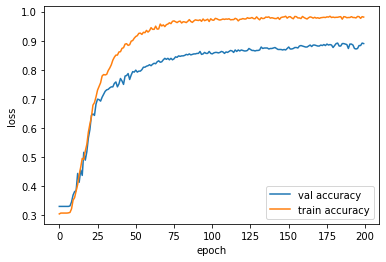

In [ ]:
import matplotlib.pyplot as plt
def plot_loss(history):
  plt.plot(history.history['val_acc'],label="val accuracy")
  plt.plot(history.history['acc'],label="train accuracy")
  plt.xlabel('epoch')
  plt.ylabel('loss')

  plt.legend()
  plt.show()

plot_loss(history)

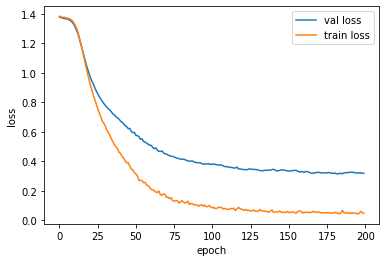

In [ ]:
import matplotlib.pyplot as plt
def plot_loss(history):
  plt.plot(history.history['val_loss'],label="val loss")
  plt.plot(history.history['loss'],label="train loss")
  plt.xlabel('epoch')
  plt.ylabel('loss')

  plt.legend()
  plt.show()

plot_loss(history)

In [ ]:
model.save("lyrics_cnn.h5")